### Previsão de Ordens Project
(Supervised Learning)

### 01. Implementação do projeto de ciência de dados
O objetivo principal é usar esses dados para prever a quantidade de impurezas no concentrado de minério. Como essa impureza é medida a cada hora, se pudermos prever a quantidade de sílica (impureza) no concentrado de minério, poderemos ajudar os engenheiros, fornecendo-lhes informações antecipadas para que tomem medidas. Assim, eles poderão tomar medidas corretivas com antecedência (reduzir a impureza, se for o caso) e também ajudar o meio ambiente (reduzindo a quantidade de minério que vai para os rejeitos à medida que você reduz a sílica no concentrado de minério).

Para este projeto, todos os dados foram analisados usando-os juntos e separadamente, usando gráficos e testes foram realizados com diferentes algoritmos para obter os melhores resultados.

Todos os modelos foram desenvolvidos usando python.

Os dados estão no arquivo “MiningProcess_Flotation_Plant_Database.csv” em formato csv e, após serem recebidos, foram processados em um notebook para uso posterior pelo ML.

In [ ]:
# You may need to install the following libraries:
# pip install pandas numpy
# pip install matplotlib
# pip install seaborn
# pip install xgboost
# pip install scikit-learn

In [ ]:
# Import related packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Statistics
from scipy.stats import zscore

# Feature preprocessing and engineering (scikit-learn)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sklearn library
from sklearn.model_selection import train_test_split

# Build the Model and evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### 02. Obtenção de dados

In [6]:
# Carregar Dataset
file_path = "data/MiningProcess_Flotation_Plant_Database.csv"

df_raw = pd.read_csv(
    file_path,
    sep=",",
    decimal=",",    
    encoding="utf-8",
    parse_dates=['date']
)

df = df_raw.copy()

print("Shape:", df_raw.shape)
# df_raw.head()
print("Shape:", df.shape)
df.head()

Shape: (737453, 24)
Shape: (737453, 24)


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


### 03. Análise exploratória de dados e limpeza de dados

In [ ]:
# Relatório de qualidade das datas
print("Linhas totais:", len(df))
print("Datas válidas:", df['date'].notna().sum())
print("Datas inválidas:", df['date'].isna().sum())

# Tratamento final
clean_df = df.dropna(subset=['date']).reset_index(drop=True)
print("Linhas Clean:", len(clean_df)) # Nenhuma linha precisou ser removida

# Contagem por coluna
missing_count = df.isnull().sum()
print("\nQuantidade de valores faltantes por coluna:")
print(missing_count[missing_count > 0] if missing_count.sum() > 0 
      else "Nenhum valor faltante encontrado!")

# Porcentagem por coluna
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
print("\nPercentual de valores faltantes por coluna:")
print(missing_percent[missing_percent > 0] if missing_percent.sum() > 0 
      else "Todas as colunas estão completas!")

# Resumo
print(f"Total de linhas: {len(df)}")
print(f"Total de células (linhas × colunas): {df.size}")
print(f"Células com valores faltantes: {df.isnull().sum().sum()}")
print(f"Percentual total de dados faltantes: {(df.isnull().sum().sum() / df.size * 100):.2f}%")

null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
null_percent

Linhas totais: 737453
Datas válidas: 737453
Datas inválidas: 0
Linhas Clean: 737453

Quantidade de valores faltantes por coluna:
Nenhum valor faltante encontrado!

Percentual de valores faltantes por coluna:
Todas as colunas estão completas!
Total de linhas: 737453
Total de células (linhas × colunas): 17698872
Células com valores faltantes: 0
Percentual total de dados faltantes: 0.00%


date                            0.0
% Iron Feed                     0.0
% Silica Feed                   0.0
Starch Flow                     0.0
Amina Flow                      0.0
Ore Pulp Flow                   0.0
Ore Pulp pH                     0.0
Ore Pulp Density                0.0
Flotation Column 01 Air Flow    0.0
Flotation Column 02 Air Flow    0.0
Flotation Column 03 Air Flow    0.0
Flotation Column 04 Air Flow    0.0
Flotation Column 05 Air Flow    0.0
Flotation Column 06 Air Flow    0.0
Flotation Column 07 Air Flow    0.0
Flotation Column 01 Level       0.0
Flotation Column 02 Level       0.0
Flotation Column 03 Level       0.0
Flotation Column 04 Level       0.0
Flotation Column 05 Level       0.0
Flotation Column 06 Level       0.0
Flotation Column 07 Level       0.0
% Iron Concentrate              0.0
% Silica Concentrate            0.0
dtype: float64

Período total do dataset:
Data mínima: 2017-03-10 01:00:00
Data máxima: 2017-09-09 23:00:00
Total de dias: 183


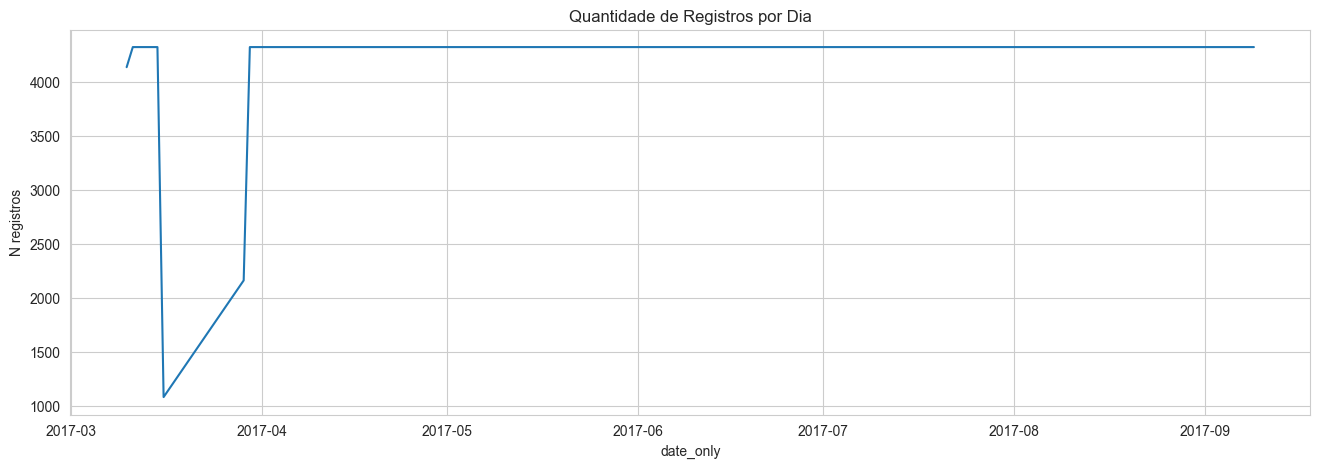

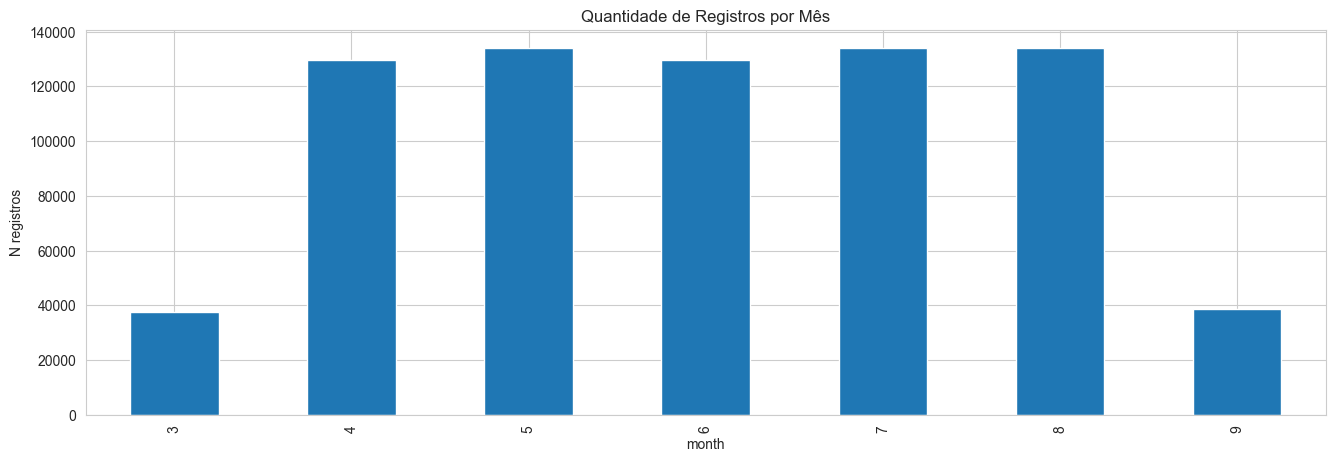

Dias faltantes no dataset: 12


[datetime.date(2017, 3, 17),
 datetime.date(2017, 3, 18),
 datetime.date(2017, 3, 19),
 datetime.date(2017, 3, 20),
 datetime.date(2017, 3, 21),
 datetime.date(2017, 3, 22),
 datetime.date(2017, 3, 23),
 datetime.date(2017, 3, 24),
 datetime.date(2017, 3, 25),
 datetime.date(2017, 3, 26),
 datetime.date(2017, 3, 27),
 datetime.date(2017, 3, 28)]

In [6]:
# Adicionando novas colunas de datas para futuras análises
iso_calendar = df['date'].dt.isocalendar()

df['date_only'] = df['date'].dt.date
df['month'] = df['date'].dt.month
# df['year_month'] = df['date'].dt.to_period('M')
df['week_number'] = df['date'].dt.isocalendar().week
df['weekday'] = iso_calendar.day  # 1=segunda, 7=domingo
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# Primeira visão geral do tempo do dataset
print("Período total do dataset:")
print("Data mínima:", df['date'].min())
print("Data máxima:", df['date'].max())
print("Total de dias:", (df['date'].max() - df['date'].min()).days)

# Contagem por dia
counts_by_day = df.groupby('date_only').size()
plt.figure(figsize=(16,5))
counts_by_day.plot()
plt.title("Quantidade de Registros por Dia")
plt.ylabel("N registros")
plt.show()

# Contagem por mes
counts_by_month = df.groupby('month').size()
plt.figure(figsize=(16,5))
counts_by_month.plot(kind='bar')
plt.title("Quantidade de Registros por Mês")
plt.ylabel("N registros")
plt.show()

# Contagem de dias faltantes
all_days = pd.date_range(df['date_only'].min(), df['date_only'].max())
missing_days = set(all_days.date) - set(df['date_only'].unique())
print("Dias faltantes no dataset:", len(missing_days))
list(sorted(missing_days))[:13]

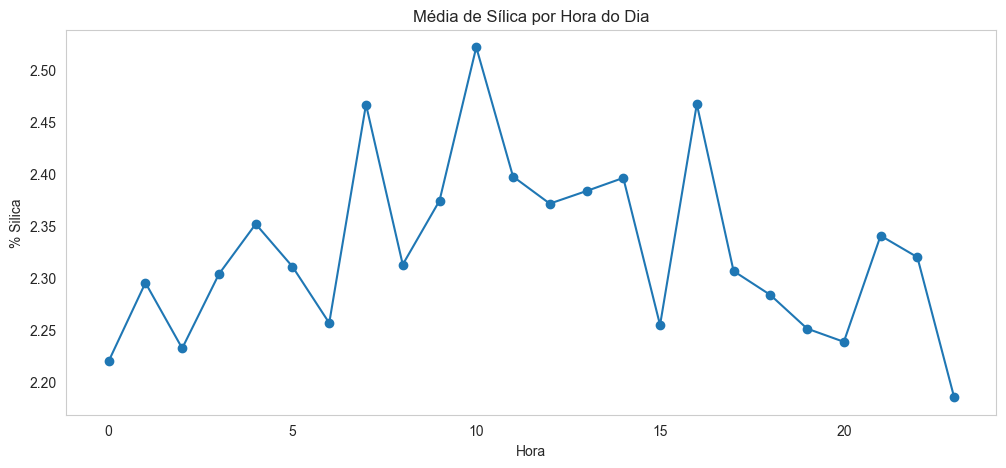

In [7]:
target_column = '% Silica Concentrate'

hour_mean = df.groupby('hour')['% Silica Concentrate'].mean()

plt.figure(figsize=(12,5))
hour_mean.plot(marker='o')
plt.title("Média de Sílica por Hora do Dia")
plt.ylabel("% Silica")
plt.xlabel("Hora")
plt.grid()
plt.show()

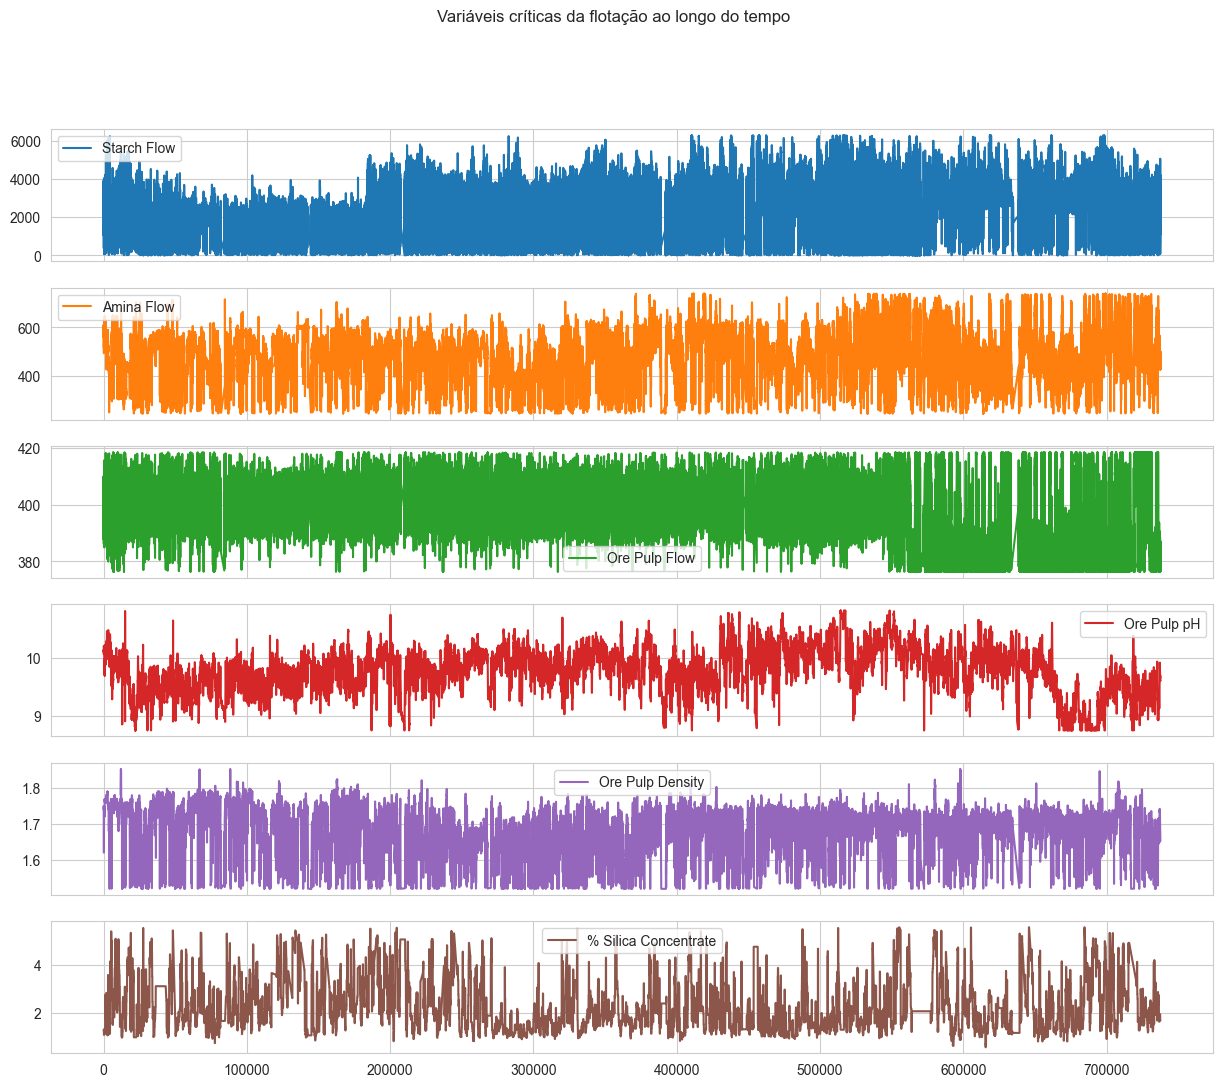

In [8]:
important_cols = [
    "Starch Flow",
    "Amina Flow",
    "Ore Pulp Flow",
    "Ore Pulp pH",
    "Ore Pulp Density",
    "% Silica Concentrate"
]

df[important_cols].plot(subplots=True, figsize=(15,12))
plt.suptitle("Variáveis críticas da flotação ao longo do tempo")
plt.show()

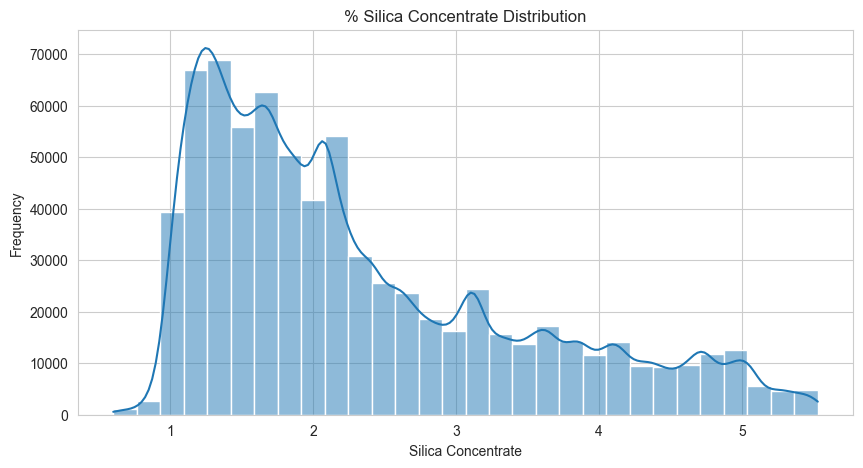

In [9]:
# Histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10,5))
sns.histplot(df['% Silica Concentrate'], bins=30, kde=True)
plt.title('% Silica Concentrate Distribution')
plt.xlabel('Silica Concentrate')
plt.ylabel('Frequency')
plt.show()

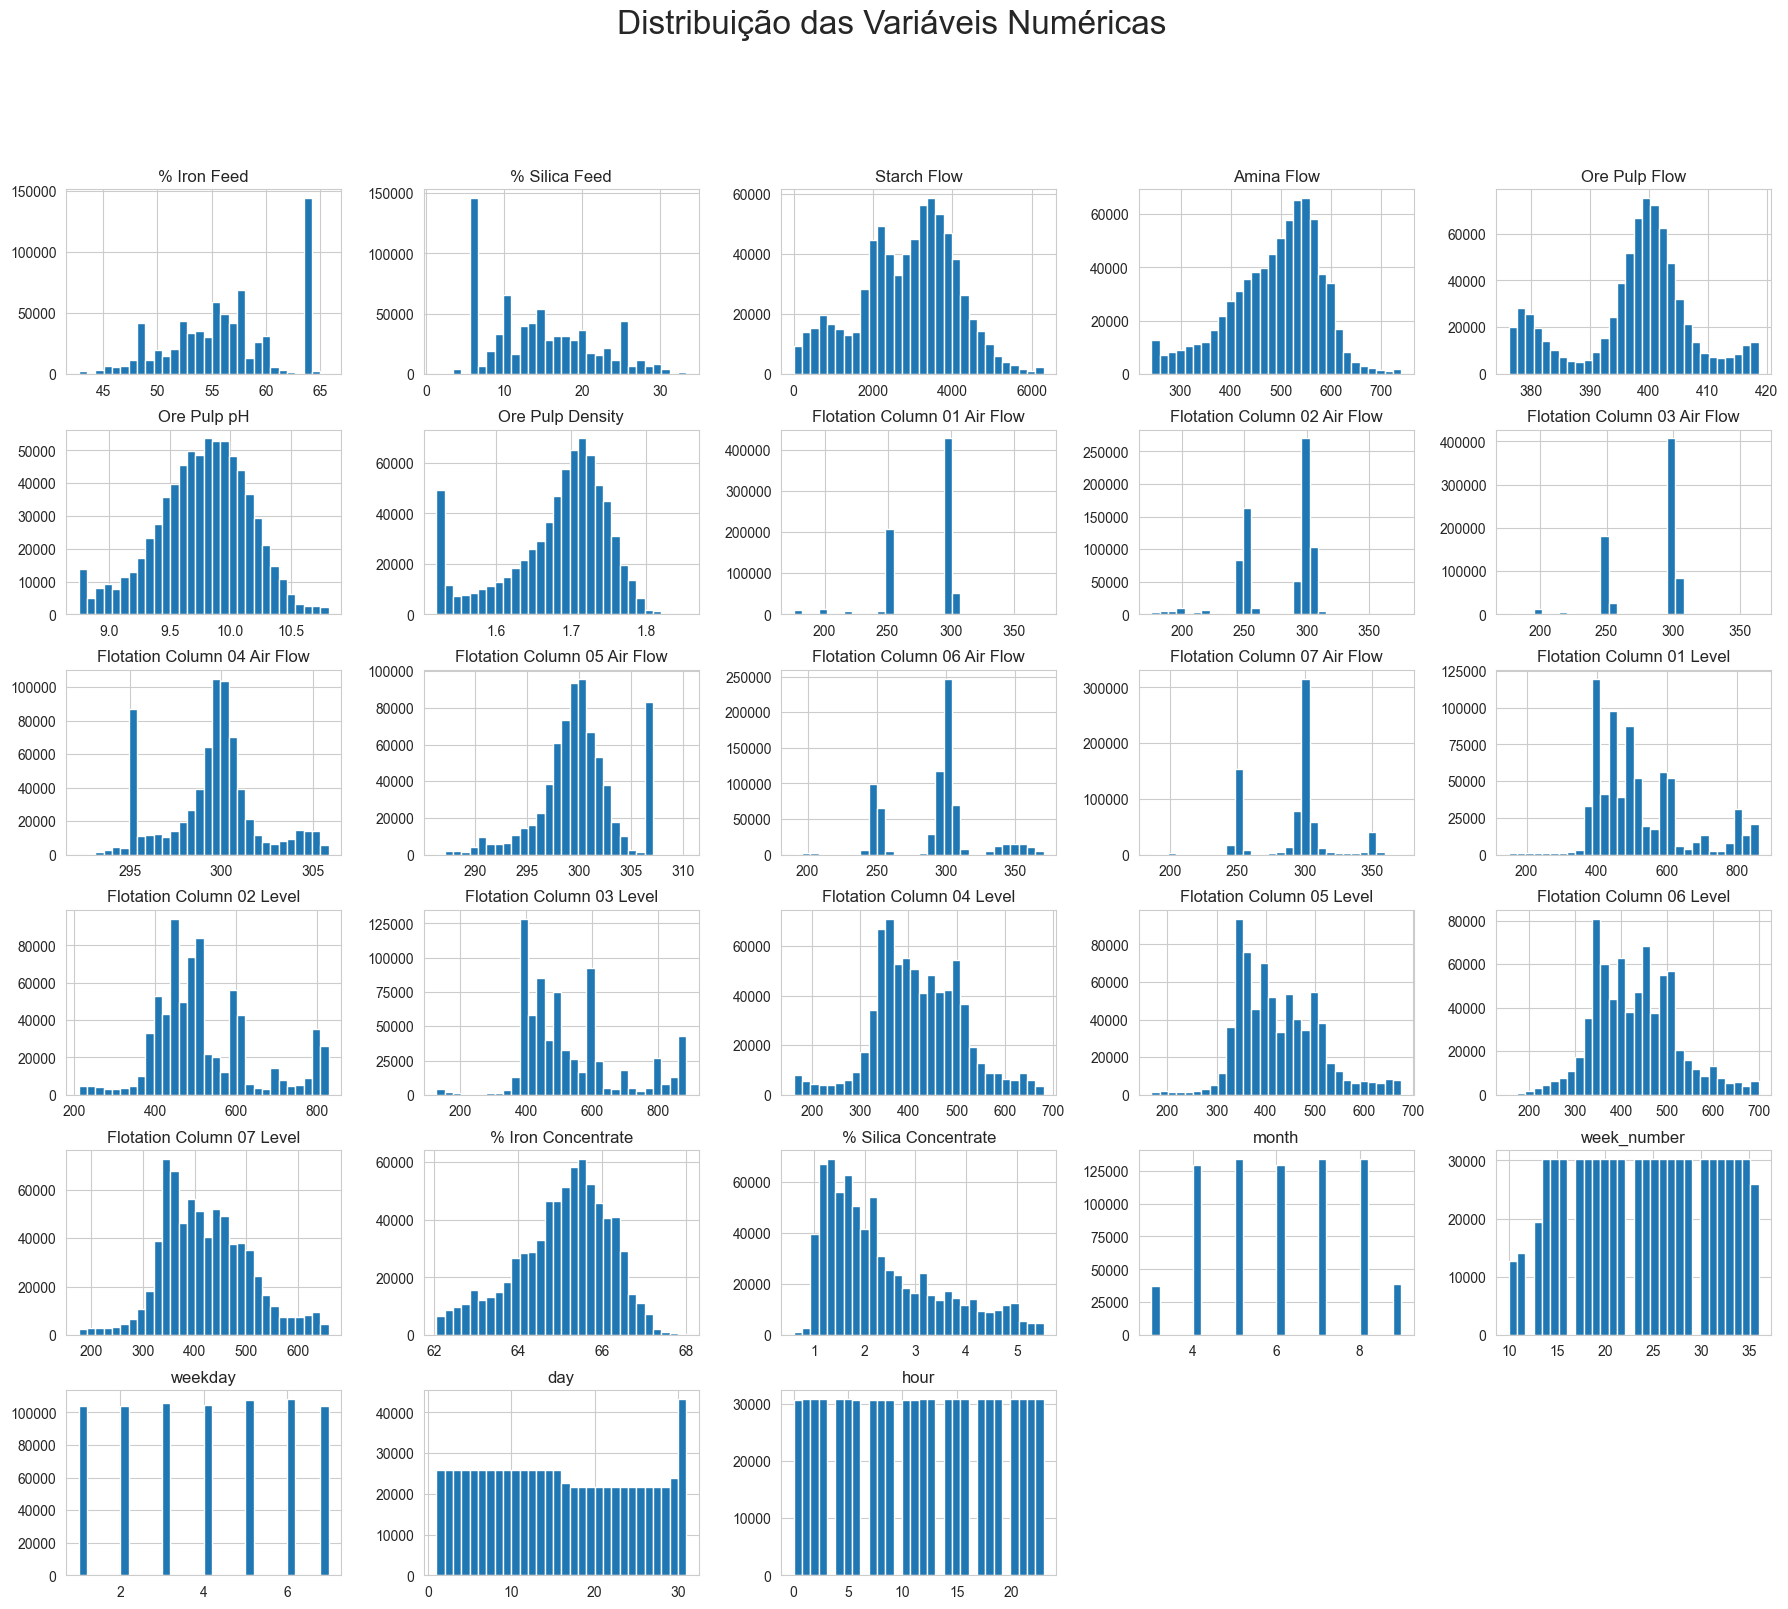

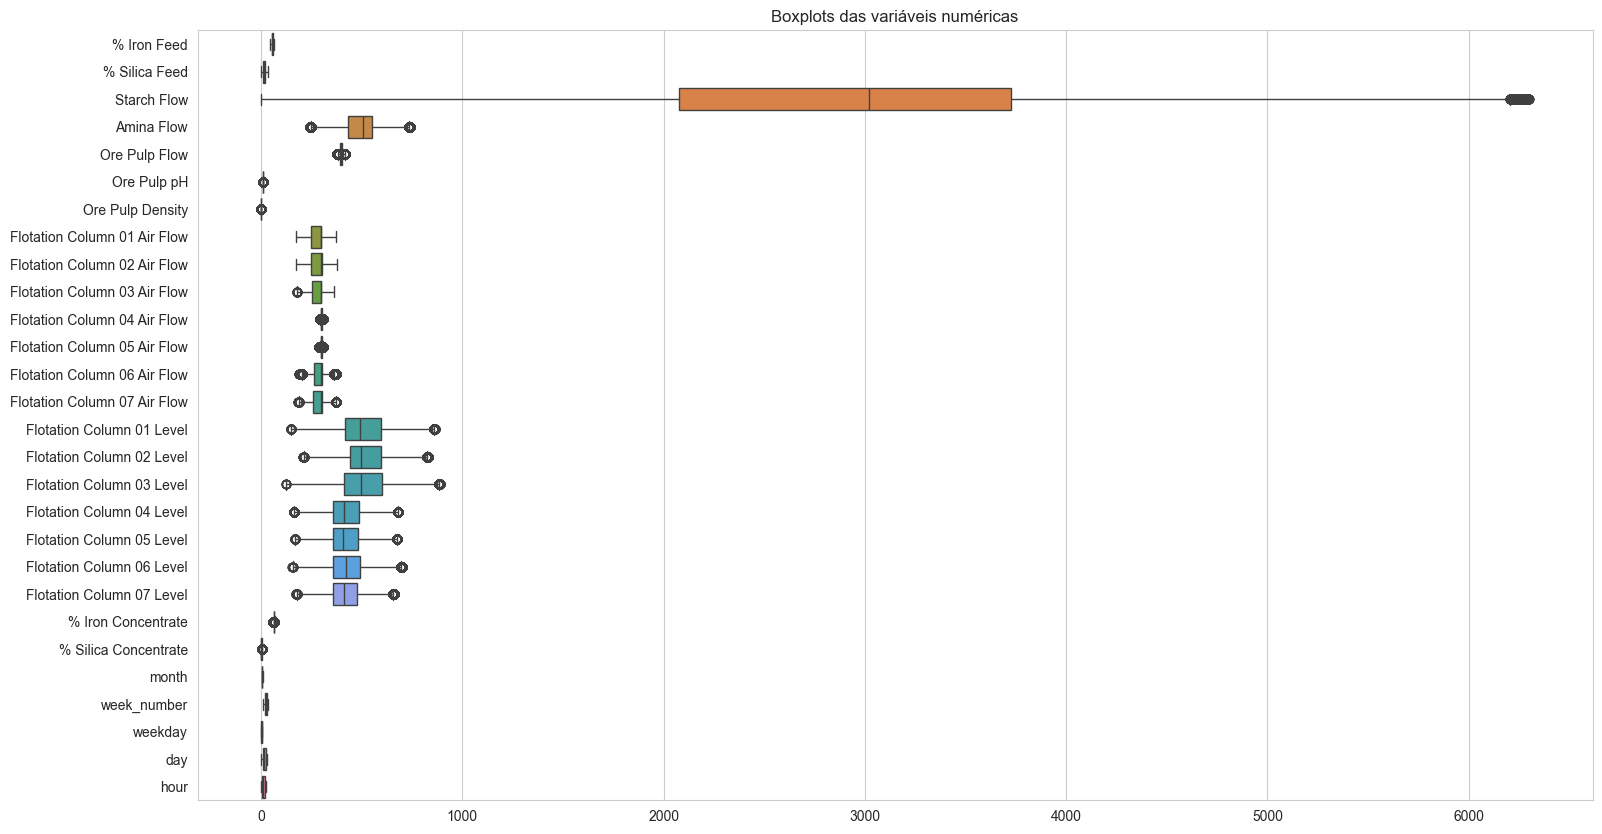

In [10]:
# Distribuições (Histogramas + KDE)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(22, 18), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=24)
plt.show()

# Caso queira olhar mais proximo cada grafico:
# for col in numeric_cols:
#     plt.figure(figsize=(10,5))
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribuição — {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequência')
#     plt.tight_layout()
#     plt.show()

plt.figure(figsize=(18,10))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplots das variáveis numéricas")
plt.show()

In [11]:
# Estatísticas descritivas gerais
stats_overview = df.describe().T
stats_overview['skewness'] = df.skew(numeric_only=True) # Assimetria e curtose
stats_overview['kurtosis'] = df.kurtosis(numeric_only=True)

df.info()
stats_overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

,count,mean,min,25%,50%,75%,max,std,skewness,kurtosis
date,737453,2017-06-16 03:27:22.656549376,2017-03-10 01:00:00,2017-05-04 23:00:00,2017-06-16 15:00:00,2017-07-29 07:00:00,2017-09-09 23:00:00,NaN,<NA>,<NA>
% Iron Feed,737453.0,56.294739,42.74,52.67,56.08,59.72,65.78,5.157744,0.000415,-0.742448
% Silica Feed,737453.0,14.651716,1.31,8.94,13.85,19.6,33.4,6.807439,0.439712,-0.733833
Starch Flow,737453.0,2869.140569,0.002026,2076.32,3018.43,3727.73,6300.23,1215.203734,-0.242592,-0.326825
Amina Flow,737453.0,488.144697,241.669,431.796,504.393,553.257,739.538,91.230534,-0.568416,0.07882
Ore Pulp Flow,737453.0,397.578372,376.249,394.264,399.249,402.968,418.641,9.699785,-0.470964,-0.043824
Ore Pulp pH,737453.0,9.767639,8.75334,9.52736,9.7981,10.038,10.8081,0.387007,-0.351043,0.019652
Ore Pulp Density,737453.0,1.68038,1.51982,1.64731,1.6976,1.72833,1.85325,0.069249,-0.874824,0.053133
Flotation Column 01 Air Flow,737453.0,280.151856,175.51,250.281,299.344,300.149,373.871,29.621288,-1.300101,1.142771
Flotation Column 02 Air Flow,737453.0,277.159965,175.156,250.457,296.223,300.69,375.992,30.149357,-0.882725,0.10571


Skewness (Assimetria)

Mede o quanto a distribuição puxa para um lado.
Skewness	Interpretação	Significado industrial
≈ 0	simétrica	processo estável
> 0	cauda à direita	muitos valores baixos → alguns picos altos
< 0	cauda à esquerda	muitos valores altos → alguns valores baixos
No seu dataset:

Observando o df:
% Silica Concentrate: skew = ~0.97 → positiva
→ poucas horas com sílica muito alta → picos operacionais.
Air Flow de colunas: skew negativo
→ operação tendendo ao nível máximo, com raras quedas → controle automático preso no alto.
Levels das colunas: skew positivo
→ operação flutua muito para cima, poucas vezes cai → pode ser espuma instável.

Distribuições assimétricas indicam momentos críticos.
Picos e vales são momentos onde o processo “saiu do ideal”.

Você pode usar skewness para:
detectar sensores instáveis
detectar variáveis que precisam controle mais fino
ver onde a variabilidade impacta a sílica

Kurtosis (Curtose)
Mede “picos” na distribuição, ou quão extrema ela é.
Kurtosis > 0 → distribuição “pontuda”, com mais extremos
Kurtosis < 0 → mais achatada, sem extremos

No caso estudado, kurtosis alto = processo com rajadas repentinas.
Analisando o dataset:
Air Flow Column 01: kurt > 1
→ muitas variações bruscas → operador/controle mexendo muito.
% Silica Concentrate: ~0
→ distribuição estável → ótimo.
Insight operacional:
Variáveis com alta kurtosis são candidatas a:
recalibração de sensor
ajuste PID
ajuste de setpoint
aumento de deadband do controle automático

In [ ]:
# Outliers — Z-score + IQR
z_scores = df[numeric_cols].apply(zscore)
outliers_z = (abs(z_scores) > 3).sum().sort_values(ascending=False)

# IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)
outliers_iqr

Ore Pulp Flow                   109043
Flotation Column 04 Air Flow     54191
Ore Pulp Density                 43058
Flotation Column 05 Air Flow     29474
Ore Pulp pH                      11002
Flotation Column 06 Air Flow      9432
Amina Flow                        8627
% Silica Concentrate              4757
Flotation Column 06 Level         2740
% Iron Concentrate                1590
Flotation Column 02 Level         1564
Starch Flow                       1137
Flotation Column 01 Level          854
Flotation Column 03 Level          531
Flotation Column 07 Level          467
Flotation Column 04 Level          462
Flotation Column 07 Air Flow       276
Flotation Column 05 Level          236
Flotation Column 03 Air Flow        33
% Iron Feed                          0
Flotation Column 02 Air Flow         0
Flotation Column 01 Air Flow         0
% Silica Feed                        0
month                                0
week_number                          0
weekday                  

In [ ]:
# Análise Quantitativa Detalhada
analysis_df = pd.DataFrame()

for col in numeric_cols:
    stats = stats_overview.loc[col]
    
    # Converter para float nativo do Python
    mean_val = float(stats['mean'])
    std_val = float(stats['std'])
    
    analysis_df.loc[col, 'mean'] = mean_val
    analysis_df.loc[col, 'std'] = std_val
    analysis_df.loc[col, 'cv_%'] = round((std_val / mean_val * 100), 1) if mean_val != 0 else np.nan
    analysis_df.loc[col, 'median'] = float(stats['50%'])
    analysis_df.loc[col, 'iqr'] = float(stats['75%']) - float(stats['25%'])
    analysis_df.loc[col, 'range'] = float(stats['max']) - float(stats['min'])
    analysis_df.loc[col, 'skewness'] = float(stats['skewness'])
    
    # Outliers
    outliers_count = outliers_iqr.get(col, 0)
    analysis_df.loc[col, 'outliers_count'] = outliers_count
    analysis_df.loc[col, 'outliers_%'] = round((outliers_count / len(df) * 100), 2)
    
    # Classificação de assimetria
    skew_val = abs(float(stats['skewness']))
    if skew_val > 0.5:
        analysis_df.loc[col, 'skew_class'] = 'Alta assimetria'
    elif skew_val > 0.25:
        analysis_df.loc[col, 'skew_class'] = 'Moderada assimetria'
    else:
        analysis_df.loc[col, 'skew_class'] = 'Próximo de simétrico'
    
    # Classificação de outliers
    outlier_pct = outliers_count / len(df) * 100
    if outlier_pct > 10:
        analysis_df.loc[col, 'outlier_class'] = 'MUITOS outliers (>10%)'
    elif outlier_pct > 5:
        analysis_df.loc[col, 'outlier_class'] = 'Muitos outliers (5-10%)'
    elif outlier_pct > 1:
        analysis_df.loc[col, 'outlier_class'] = 'Alguns outliers (1-5%)'
    elif outlier_pct > 0:
        analysis_df.loc[col, 'outlier_class'] = 'Poucos outliers (<1%)'
    else:
        analysis_df.loc[col, 'outlier_class'] = 'Sem outliers'

analysis_df.sort_values('outliers_%', ascending=False).head(20) # Ordenar por % de outliers
analysis_df

,mean,std,cv_%,median,iqr,range,skewness,outliers_count,outliers_%,skew_class,outlier_class
% Iron Feed,56.294739,5.157744,9.2,56.080000,7.050000,23.040000,0.000415,0.0,0.00,Próximo de simétrico,Sem outliers
% Silica Feed,14.651716,6.807439,46.5,13.850000,10.660000,32.090000,0.439712,0.0,0.00,Moderada assimetria,Sem outliers
Starch Flow,2869.140569,1215.203734,42.4,3018.430000,1651.410000,6300.227974,-0.242592,1137.0,0.15,Próximo de simétrico,Poucos outliers (<1%)
Amina Flow,488.144697,91.230534,18.7,504.393000,121.461000,497.869000,-0.568416,8627.0,1.17,Alta assimetria,Alguns outliers (1-5%)
Ore Pulp Flow,397.578372,9.699785,2.4,399.249000,8.704000,42.392000,-0.470964,109043.0,14.79,Moderada assimetria,MUITOS outliers (>10%)
Ore Pulp pH,9.767639,0.387007,4.0,9.798100,0.510640,2.054760,-0.351043,11002.0,1.49,Moderada assimetria,Alguns outliers (1-5%)
Ore Pulp Density,1.680380,0.069249,4.1,1.697600,0.081020,0.333430,-0.874824,43058.0,5.84,Alta assimetria,Muitos outliers (5-10%)
Flotation Column 01 Air Flow,280.151856,29.621288,10.6,299.344000,49.868000,198.361000,-1.300101,0.0,0.00,Alta assimetria,Sem outliers
Flotation Column 02 Air Flow,277.159965,30.149357,10.9,296.223000,50.233000,200.836000,-0.882725,0.0,0.00,Alta assimetria,Sem outliers
Flotation Column 03 Air Flow,281.082397,28.558268,10.2,298.696000,49.527000,187.877000,-1.242088,33.0,0.00,Alta assimetria,Poucos outliers (<1%)


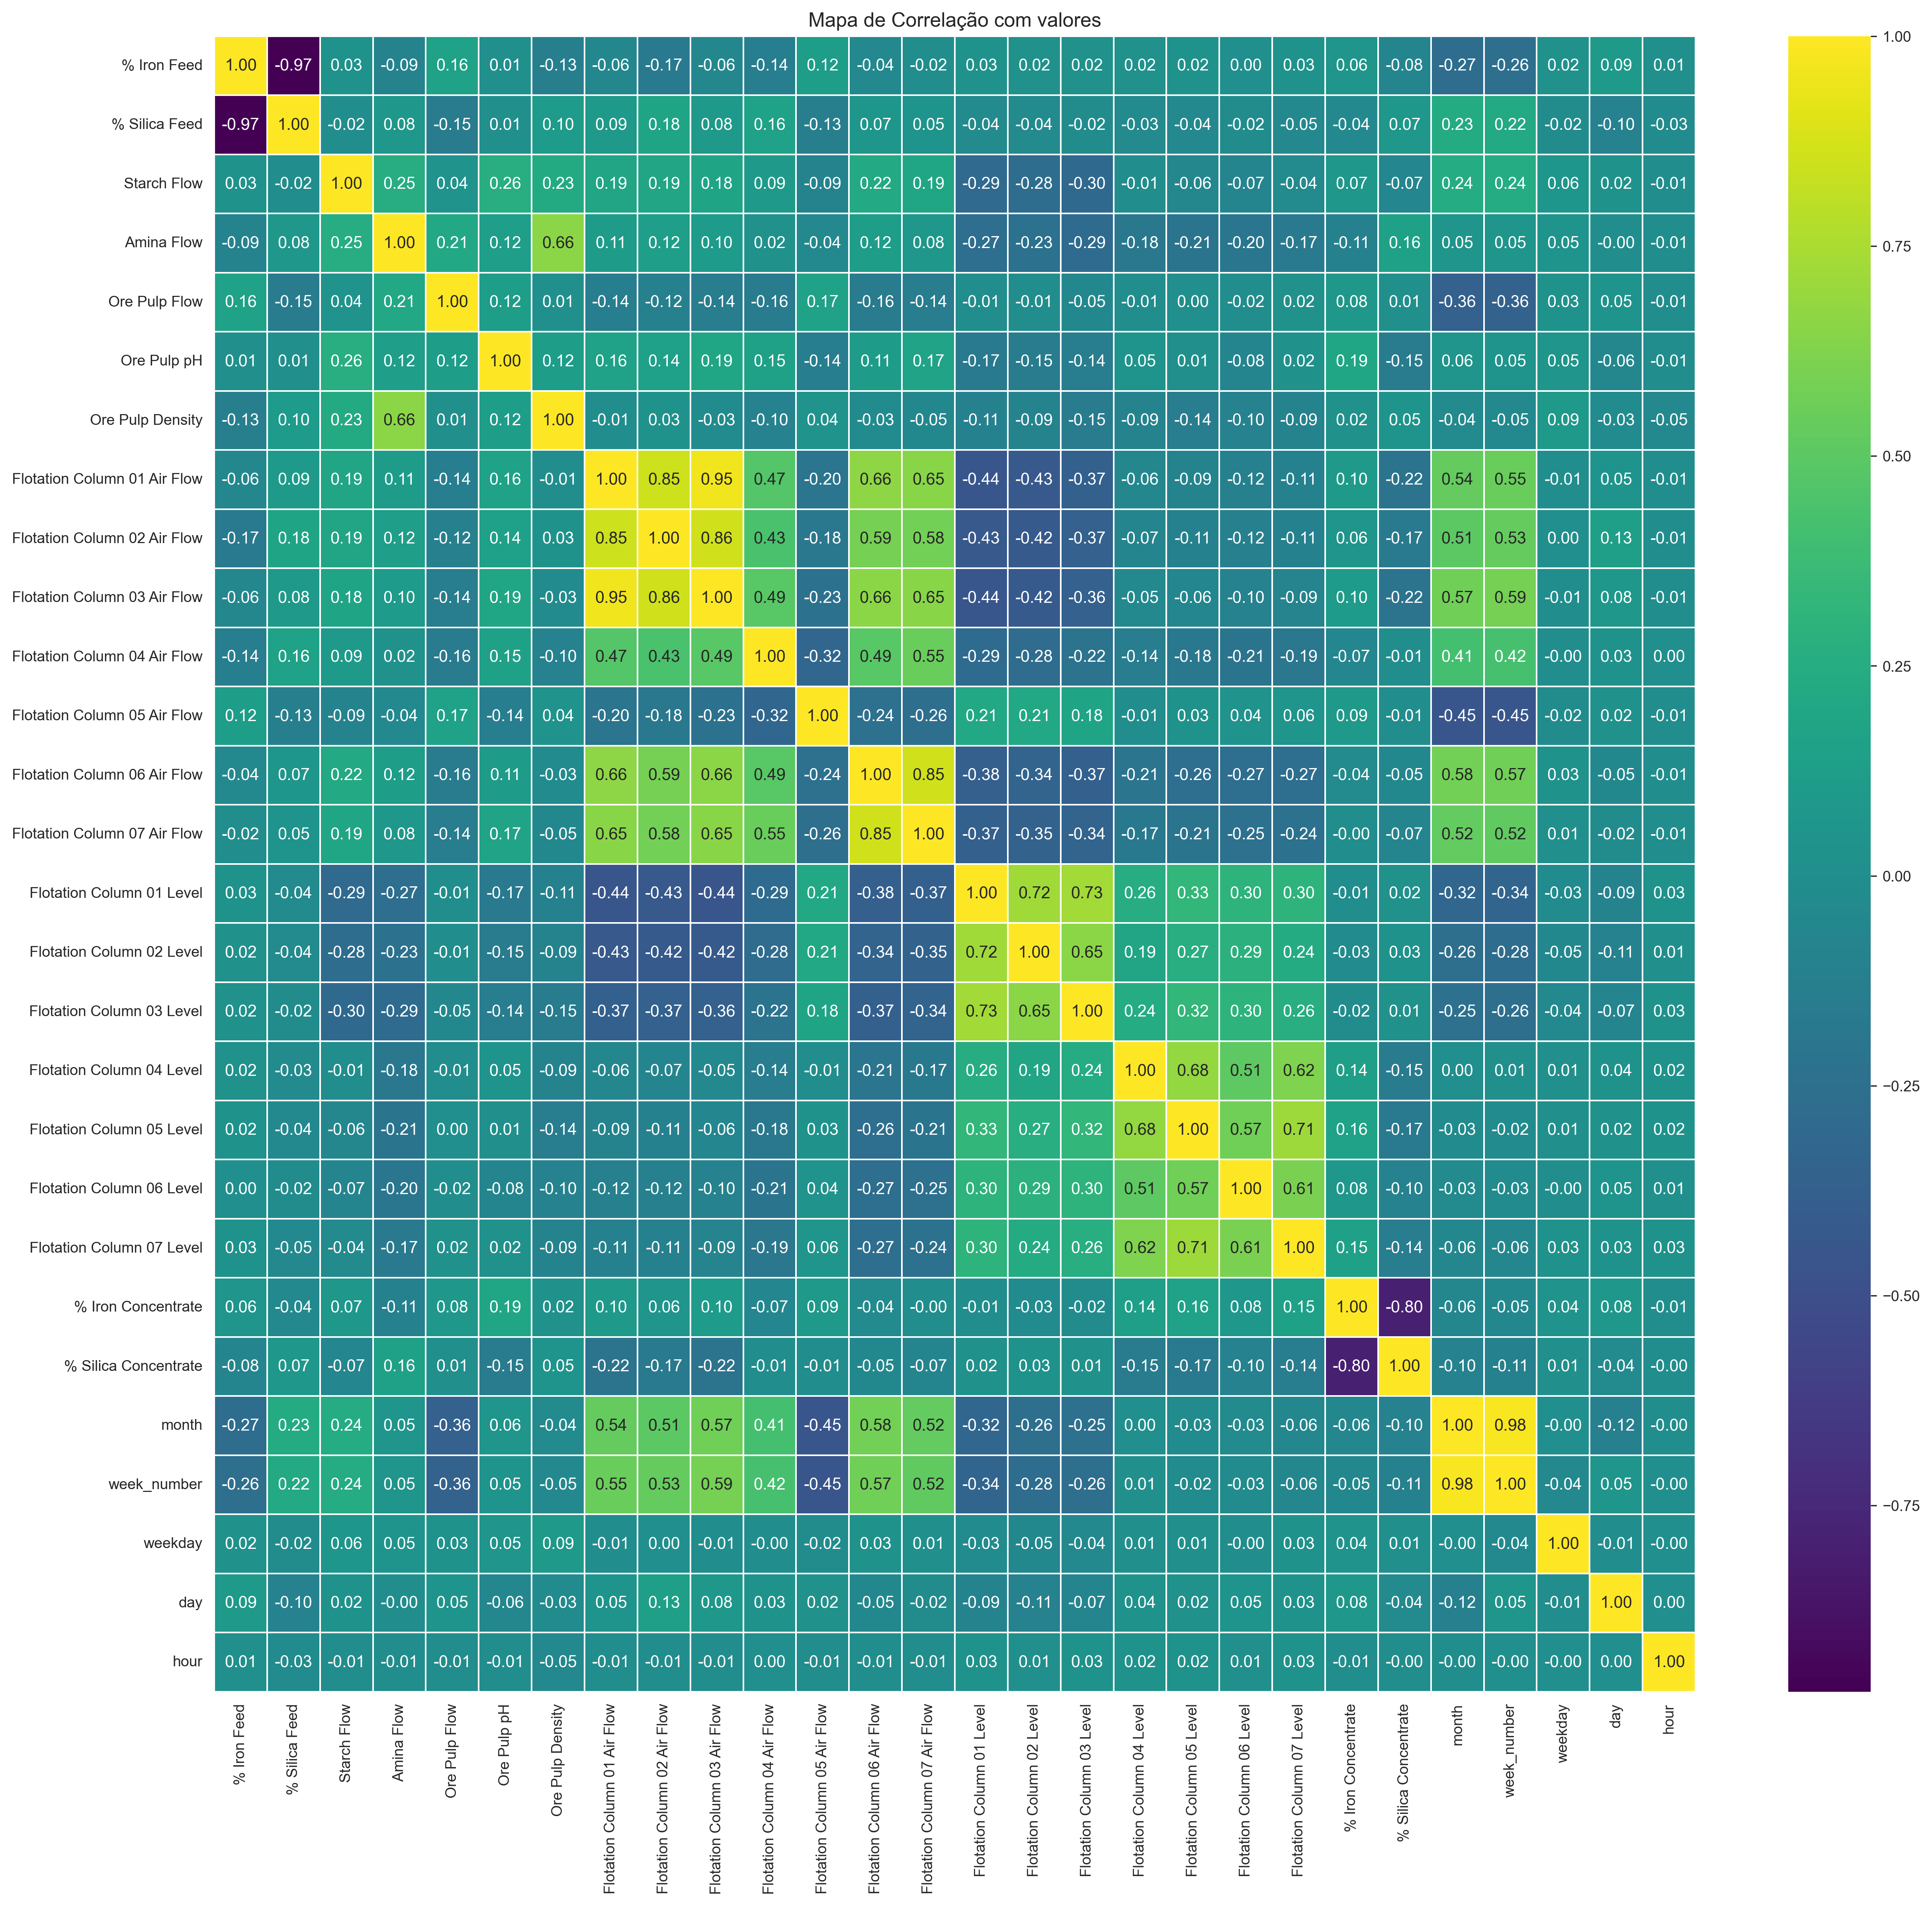

In [26]:
numeric_cols = df.select_dtypes(include=np.number).columns

corr = df[numeric_cols].corr()

plt.figure(figsize=(20,18))
sns.heatmap(
    corr,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de Correlação com valores")
plt.show()

In [27]:
# Calculate correlations with target variable, excluding non-numeric columns
correlations = df.select_dtypes(include=['number']).corr()[target_column].sort_values(ascending=False)
print("Top correlations with % Silica Concentrate:")
print(correlations.head(10))
print("\nBottom correlations with % Silica Concentrate:")
print(correlations.tail(10))
print("\n")

Top correlations with % Silica Concentrate:
% Silica Concentrate         1.000000
Amina Flow                   0.156701
% Silica Feed                0.072724
Ore Pulp Density             0.046984
Flotation Column 02 Level    0.030955
Flotation Column 01 Level    0.017217
Flotation Column 03 Level    0.014246
weekday                      0.009041
Ore Pulp Flow                0.008222
hour                        -0.003713
Name: % Silica Concentrate, dtype: float64

Bottom correlations with % Silica Concentrate:
Flotation Column 06 Level      -0.102443
week_number                    -0.109586
Flotation Column 07 Level      -0.141387
Ore Pulp pH                    -0.147739
Flotation Column 04 Level      -0.149456
Flotation Column 02 Air Flow   -0.167398
Flotation Column 05 Level      -0.169170
Flotation Column 03 Air Flow   -0.218891
Flotation Column 01 Air Flow   -0.219158
% Iron Concentrate             -0.800560
Name: % Silica Concentrate, dtype: float64




In [28]:
# 4. AUTOCORRELAÇÃO DE VARIÁVEIS (COMPREENSÍVEL)

target = "% Silica Concentrate"
# plt.figure(figsize=(12, 6))
# autocorrelation_plot(clean_df[target])
# plt.title("Autocorrelação da % Silica Concentrate")
# plt.show()

# Interpretação rápida embutida (texto para o usuário)
print("""
INTERPRETAÇÃO DO GRÁFICO DE AUTOCORRELAÇÃO:
- Lag = quanto você desloca a série para comparar com ela mesma.
- Valores próximos de 1 = forte relação com o passado.
- Valores próximos de 0 = pouca relação.
- No gráfico, o início tem autocorrelação alta (processo industrial lento).
- Depois estabiliza em ~0, indicando fraca memória de longo prazo.
""")


INTERPRETAÇÃO DO GRÁFICO DE AUTOCORRELAÇÃO:
- Lag = quanto você desloca a série para comparar com ela mesma.
- Valores próximos de 1 = forte relação com o passado.
- Valores próximos de 0 = pouca relação.
- No gráfico, o início tem autocorrelação alta (processo industrial lento).
- Depois estabiliza em ~0, indicando fraca memória de longo prazo.



### 04. Modelagem e Avaliação

In [ ]:
# Separando features numéricas
X = df.select_dtypes(include=np.number).drop(columns=['% Silica Concentrate'])
y = df['% Silica Concentrate']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

print("\n[Linear Regression]")
print(f"MAE : {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2  : {r2_lr:.4f}")

# 2. Random Forest
model_rf = RandomForestRegressor(n_estimators=300, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

print("\n[Random Forest]")
print(f"MAE : {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2  : {r2_rf:.4f}")

print("\nFeature Importances (RandomForest):")
fi_rf = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi_rf.head(15))

# 3. XGBoost
model_xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=6,
    random_state=42
)

model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))
r2_xgb = r2_score(y_test, pred_xgb)

print("\n[XGBoost]")
print(f"MAE : {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R2  : {r2_xgb:.4f}")

print("\nFeature Importances (XGBoost):")
fi_xgb = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi_xgb.head(15))


[Linear Regression]
MAE : 0.4824
RMSE: 0.6264
R2  : 0.6895

[Random Forest]
MAE : 0.0029
RMSE: 0.0227
R2  : 0.9996

Feature Importances (RandomForest):
% Iron Concentrate              0.712994
week_number                     0.046074
hour                            0.036797
day                             0.032076
weekday                         0.021252
% Silica Feed                   0.020223
% Iron Feed                     0.019562
Ore Pulp pH                     0.014719
Amina Flow                      0.012453
Flotation Column 03 Level       0.012293
Flotation Column 04 Air Flow    0.010841
Ore Pulp Density                0.008920
Flotation Column 05 Air Flow    0.008244
Flotation Column 01 Level       0.006826
Flotation Column 02 Level       0.005834
dtype: float64

[XGBoost]
MAE : 0.1832
RMSE: 0.2577
R2  : 0.9475

Feature Importances (XGBoost):
% Iron Concentrate              0.318664
week_number                     0.103416
Flotation Column 01 Air Flow    0.056077
month       

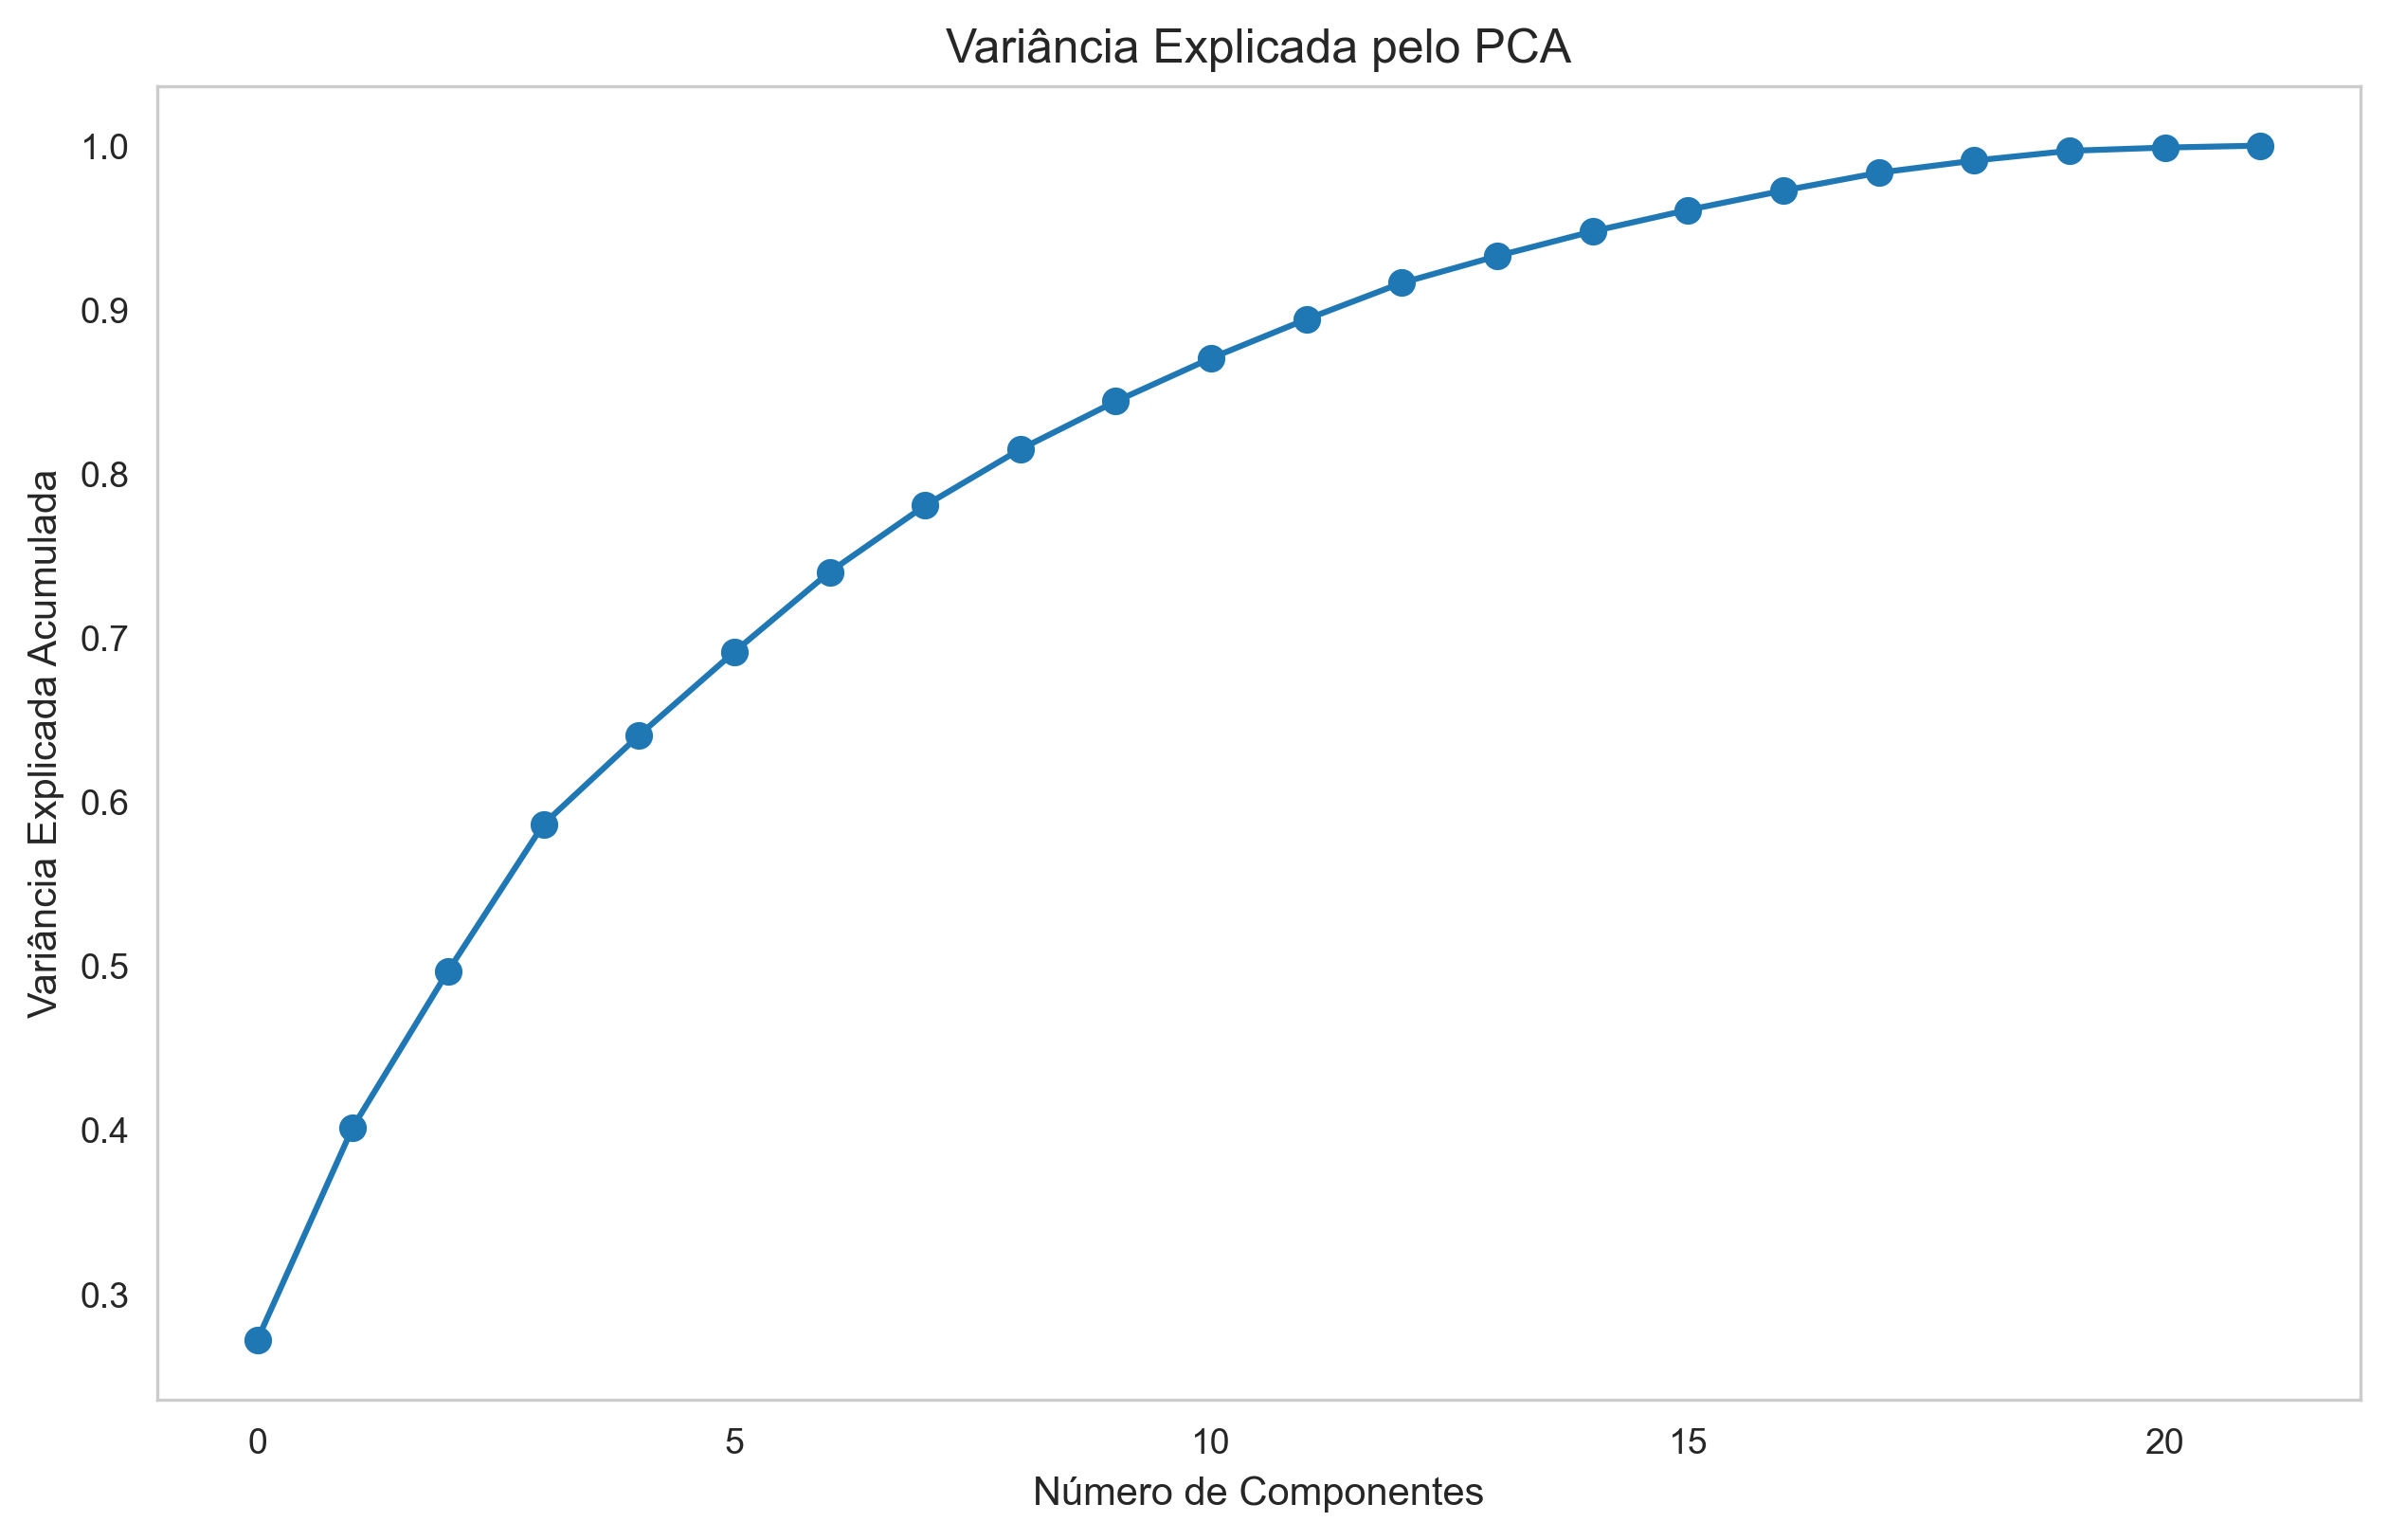

In [ ]:
# Selecionar apenas variáveis numéricas
X_raw = df.select_dtypes('float64').drop(columns=['% Silica Concentrate'])

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# PCA completo
pca = PCA()
components = pca.fit_transform(X_scaled)

# Variância explicada acumulada
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Variância Explicada pelo PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.grid()
plt.show()

# Criar DataFrame dos componentes principais (vamos usar 5 componentes)
pca_df = pd.DataFrame(components[:, :5], columns=[f"PCA_{i+1}" for i in range(5)])

# Variáveis temporais
time_df = df[['hour', 'weekday', 'month']].reset_index(drop=True)

# Target
y = df['% Silica Concentrate'].reset_index(drop=True)

# Dataset COM PCA
X_pca = pd.concat([pca_df, time_df], axis=1)

# Dataset SEM PCA
X_nopca = pd.concat([X_raw, time_df], axis=1)


In [53]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [ ]:
# 4. Linear Regression + PCA
model_lr_pca = LinearRegression()
model_lr_pca.fit(X_train_pca, y_train)
pred_lr_pca = model_lr_pca.predict(X_test_pca)

mae_lr_pca = mean_absolute_error(y_test, pred_lr_pca)
rmse_lr_pca = np.sqrt(mean_squared_error(y_test, pred_lr_pca))
r2_lr_pca = r2_score(y_test, pred_lr_pca)

print("\n[Linear Regression + PCA]")
print(f"MAE : {mae_lr_pca:.4f}")
print(f"RMSE: {rmse_lr_pca:.4f}")
print(f"R2  : {r2_lr_pca:.4f}")


[Linear Regression + PCA]
MAE : 0.8129
RMSE: 1.0282
R2  : 0.1635


In [ ]:
# 5. Random Forest + PCA
model_rf_pca = RandomForestRegressor(n_estimators=300, random_state=42)
model_rf_pca.fit(X_train_pca, y_train)
pred_rf_pca = model_rf_pca.predict(X_test_pca)

mae_rf_pca = mean_absolute_error(y_test, pred_rf_pca)
rmse_rf_pca = np.sqrt(mean_squared_error(y_test, pred_rf_pca))
r2_rf_pca = r2_score(y_test, pred_rf_pca)

print("\n[Random Forest + PCA]")
print(f"MAE : {mae_rf_pca:.4f}")
print(f"RMSE: {rmse_rf_pca:.4f}")
print(f"R2  : {r2_rf_pca:.4f}")


[Random Forest + PCA]
MAE : 0.0533
RMSE: 0.1542
R2  : 0.9812


In [56]:
# 6. XGBoost + PCA
model_xgb_pca = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=6,
    random_state=42
)

model_xgb_pca.fit(X_train_pca, y_train)
pred_xgb_pca = model_xgb_pca.predict(X_test_pca)

mae_xgb_pca = mean_absolute_error(y_test, pred_xgb_pca)
rmse_xgb_pca = np.sqrt(mean_squared_error(y_test, pred_xgb_pca))
r2_xgb_pca = r2_score(y_test, pred_xgb_pca)

print("\n[XGBoost + PCA]")
print(f"MAE : {mae_xgb_pca:.4f}")
print(f"RMSE: {rmse_xgb_pca:.4f}")
print(f"R2  : {r2_xgb_pca:.4f}")

print("\nFeature Importances (XGBoost + PCA):")
fi_xgb_pca = pd.Series(model_xgb_pca.feature_importances_, index=X_pca.columns)
print(fi_xgb_pca.sort_values(ascending=False).head(10))


[XGBoost + PCA]
MAE : 0.4653
RMSE: 0.6319
R2  : 0.6841

Feature Importances (XGBoost + PCA):
PCA_2      0.246045
PCA_3      0.144855
month      0.141674
weekday    0.107507
PCA_1      0.104144
PCA_4      0.094838
PCA_5      0.085492
hour       0.075447
dtype: float32


In [57]:
comparison = pd.DataFrame({
    "Model": [
        "Linear Regression", "Random Forest", "XGBoost",
        "Linear Regression + PCA", "Random Forest + PCA", "XGBoost + PCA"
    ],
    "MAE": [
        mae_lr, mae_rf, mae_xgb,
        mae_lr_pca, mae_rf_pca, mae_xgb_pca
    ],
    "RMSE": [
        rmse_lr, rmse_rf, rmse_xgb,
        rmse_lr_pca, rmse_rf_pca, rmse_xgb_pca
    ],
    "R2": [
        r2_lr, r2_rf, r2_xgb,
        r2_lr_pca, r2_rf_pca, r2_xgb_pca
    ]
})

print("\n=== COMPARAÇÃO FINAL ===")
print(comparison)


=== COMPARAÇÃO FINAL ===
                     Model       MAE      RMSE        R2
0        Linear Regression  0.482428  0.626389  0.689542
1            Random Forest  0.002879  0.022674  0.999593
2                  XGBoost  0.183216  0.257672  0.947465
3  Linear Regression + PCA  0.812900  1.028221  0.163461
4      Random Forest + PCA  0.053292  0.154166  0.981194
5            XGBoost + PCA  0.465306  0.631891  0.684064


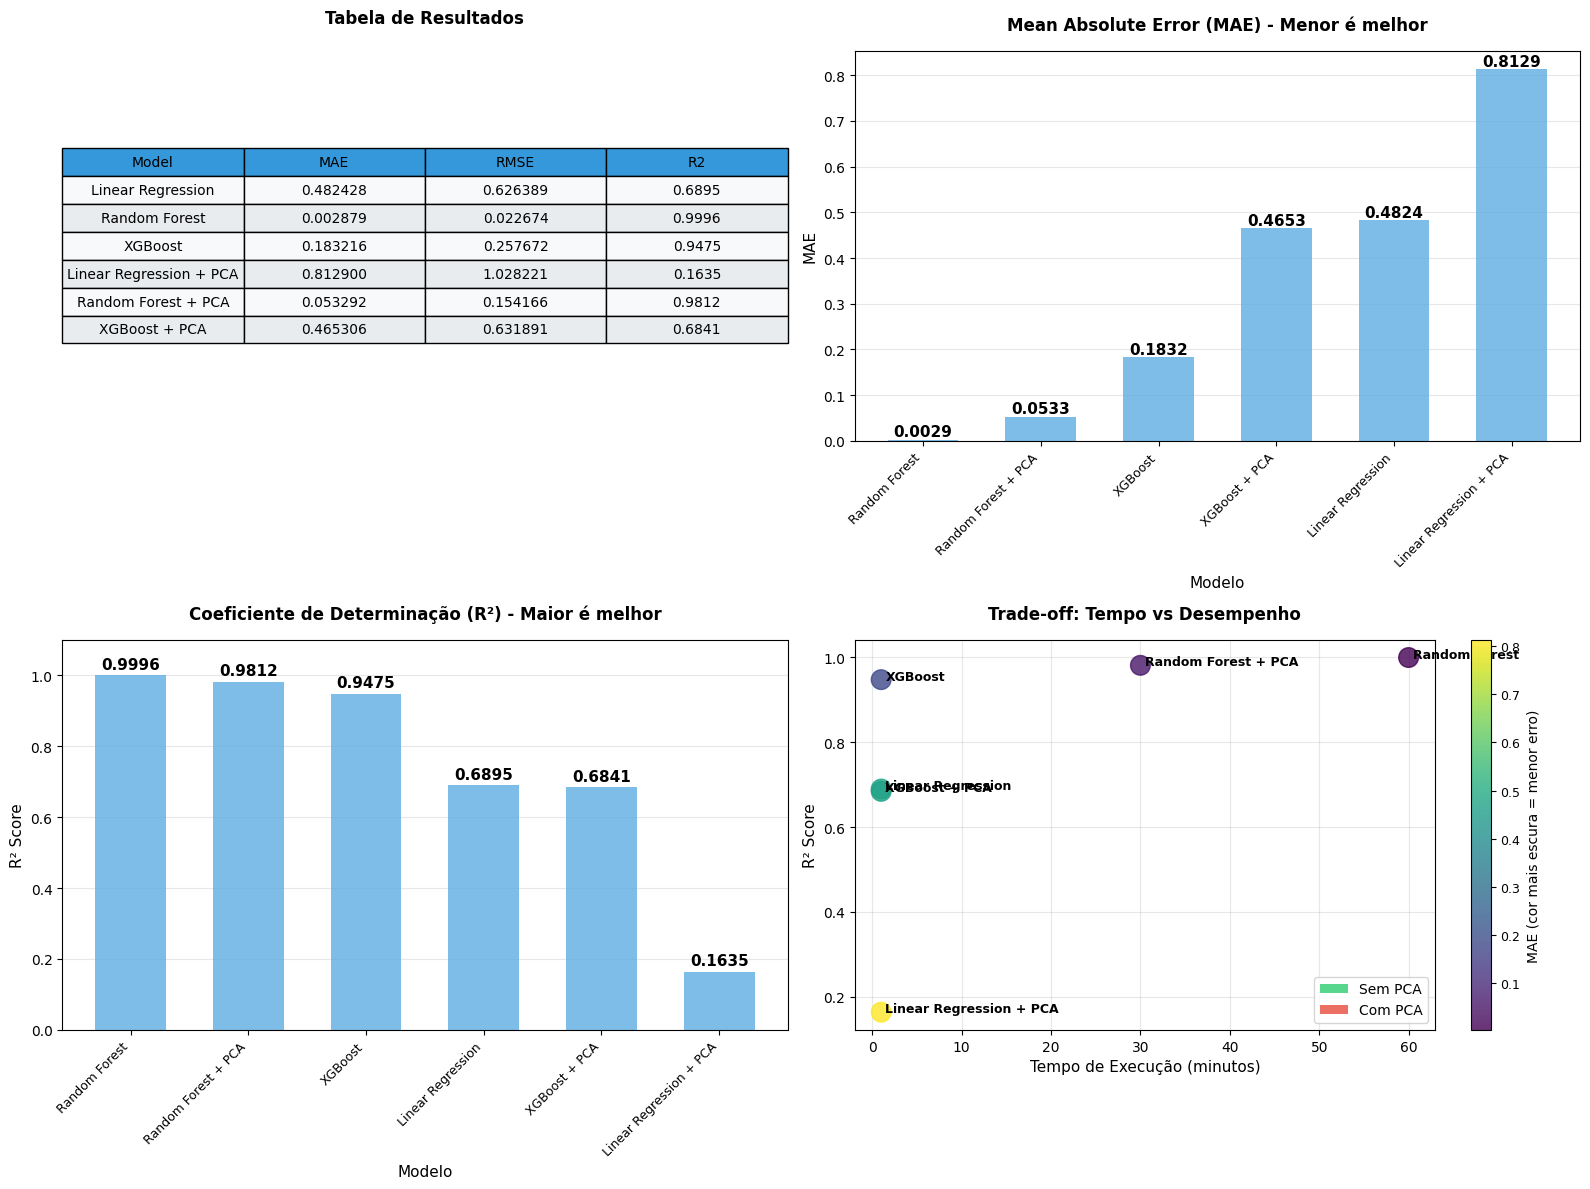

✅ Gráficos em pé com títulos salvos como 'graficos_em_pe_com_titulos.png'


In [ ]:
# Tempos de execução
tempo_execucao = {
    "Linear Regression": 1,
    "Random Forest": 60,
    "XGBoost": 1,
    "Linear Regression + PCA": 1,
    "Random Forest + PCA": 30,
    "XGBoost + PCA": 1
}
comparison['Tempo (min)'] = comparison['Model'].map(tempo_execucao)

# Criar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. TABELA
ax1 = axes[0, 0]
ax1.axis('tight')
ax1.axis('off')
ax1.set_title('Tabela de Resultados', fontsize=12, fontweight='bold', pad=20)

table_data = comparison[['Model', 'MAE', 'RMSE', 'R2']].copy()
for col in ['MAE', 'RMSE', 'R2']:
    if col == 'R2':
        table_data[col] = table_data[col].apply(lambda x: f"{x:.4f}")
    else:
        table_data[col] = table_data[col].apply(lambda x: f"{x:.6f}")

# Cores zebradas
cell_colors = []
for i in range(len(table_data)):
    row_color = []
    for j in range(4):
        if i % 2 == 0:
            row_color.append('#f8f9fa')
        else:
            row_color.append('#e9ecef')
    cell_colors.append(row_color)

table = ax1.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='center',
                  cellColours=cell_colors,
                  colColours=['#3498db'] * 4)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# 2. GRÁFICO MAE (BARRAS VERTICAIS)
ax2 = axes[0, 1]
ax2.set_title('Mean Absolute Error (MAE) - Menor é melhor', 
              fontsize=12, fontweight='bold', pad=15)

comparison_sorted_mae = comparison.sort_values('MAE')
x_pos = np.arange(len(comparison_sorted_mae))
colors = ['#5dade2'] * len(comparison_sorted_mae)

# Barras VERTICAIS (em pé)
bars = ax2.bar(x_pos, comparison_sorted_mae['MAE'], color=colors, alpha=0.8, width=0.6)
ax2.set_xlabel('Modelo', fontsize=11)
ax2.set_ylabel('MAE', fontsize=11)
ax2.set_xticks(x_pos)

# Nomes inclinados (45 graus) para melhor legibilidade
ax2.set_xticklabels(comparison_sorted_mae['Model'], rotation=45, ha='right', fontsize=9)

# Adicionar valores nas barras (números maiores)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Grade
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_axisbelow(True)

# 3. GRÁFICO R² (BARRAS VERTICAIS)
ax3 = axes[1, 0]
ax3.set_title('Coeficiente de Determinação (R²) - Maior é melhor', 
              fontsize=12, fontweight='bold', pad=15)

comparison_sorted_r2 = comparison.sort_values('R2', ascending=False)
x_pos = np.arange(len(comparison_sorted_r2))
colors = ['#5dade2'] * len(comparison_sorted_r2)

# Barras VERTICAIS (em pé)
bars = ax3.bar(x_pos, comparison_sorted_r2['R2'], color=colors, alpha=0.8, width=0.6)
ax3.set_xlabel('Modelo', fontsize=11)
ax3.set_ylabel('R² Score', fontsize=11)
ax3.set_xticks(x_pos)
ax3.set_ylim(0, 1.1)

# Nomes inclinados (45 graus)
ax3.set_xticklabels(comparison_sorted_r2['Model'], rotation=45, ha='right', fontsize=9)

# Adicionar valores nas barras (números maiores)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Grade
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_axisbelow(True)

# 4. TRADE-OFF TEMPO vs DESEMPENHO
ax4 = axes[1, 1]
ax4.set_title('Trade-off: Tempo vs Desempenho', 
              fontsize=12, fontweight='bold', pad=15)

# Scatter plot com cores MAE
scatter = ax4.scatter(comparison['Tempo (min)'], comparison['R2'], 
                      s=200, alpha=0.8, c=comparison['MAE'], cmap='viridis')

# Nomes completos como labels com posicionamento
for i, txt in enumerate(comparison['Model']):
    # Posições específicas para evitar sobreposição
    if txt == "Random Forest":
        offset_x, offset_y = 3, -0.04
        fontsize = 9
    elif txt == "Random Forest + PCA":
        offset_x, offset_y = 3, 0.02
        fontsize = 9
    elif txt == "Linear Regression + PCA":
        offset_x, offset_y = 3, 0.04
        fontsize = 9
    elif txt == "Linear Regression":
        offset_x, offset_y = 3, -0.02
        fontsize = 9
    elif txt == "XGBoost":
        offset_x, offset_y = 3, 0.02
        fontsize = 9
    else:  # XGBoost + PCA
        offset_x, offset_y = 3, -0.02
        fontsize = 9
    
    ax4.annotate(txt,
                (comparison['Tempo (min)'][i], comparison['R2'][i]),
                xytext=(offset_x, offset_y), textcoords='offset points',
                fontsize=fontsize, ha='left', fontweight='bold')

ax4.set_xlabel('Tempo de Execução (minutos)', fontsize=11)
ax4.set_ylabel('R² Score', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_axisbelow(True)

# Barra de cores
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('MAE (cor mais escura = menor erro)', fontsize=10)
cbar.ax.tick_params(labelsize=9)

# Legenda PCA vs Sem PCA
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', alpha=0.8, label='Sem PCA'),
    Patch(facecolor='#e74c3c', alpha=0.8, label='Com PCA')
]
ax4.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Ajustar layout
plt.tight_layout()
plt.show()

### 05. Discussão e conclusão

De acordo com os resultados do modelo, o algoritmo que obteve o melhor resultado em comparação com os outros algoritmos foi o Random Forest sem PCA, mas o XGBoost sem PCA apresentou o melhor balanço entre precisão, estabilidade e rapidez, usando a API python.

Podemos ver que o modelo não é perfeito (“perfeito” não existe) e podemos trabalhar em alguns pontos para obter melhores resultados, criando características temporais (últimos meses), tratando melhor os outliers, mas entendo que o resultado foi bom e o modelo funciona.

Obrigado por acompanhar e, se tiver alguma sugestão ou comentário, estou totalmente aberto!

Joao Ambrosio